## Voy a hacer un analisis de la relacion entre que palabras contienen los tweets y su veracidad. Este analisis abarca, cantidad de palabras, cantidad de caracteres y palabras que aparecen.

#### Importo las bibliotecas necesarias

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns

from bokeh.plotting import figure, output_file, show
from matplotlib.colors import ListedColormap
from PIL import Image
from wordcloud import WordCloud
from math import log, sqrt

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re


Defino una paleta de colores

#### Creo el data frame en base al csv

In [2]:
tweets = pd.read_csv('csv/train.csv', encoding='latin-1')

In [3]:
cmap = cm.get_cmap('YlOrBr')

#### Analizo como esta formado mi data frame

In [4]:
tweets.sample(n=3)

,id,keyword,location,text,target
5583,7968,razed,NaN,The Latest: More Homes Razed by Northern Calif...,1
4678,6649,landslide,"Melbourne, Australia",@kemal_atlay caught in a landslide,1
4863,6925,mass%20murderer,"Huntsville, AL",@TheEconomist Step one: get that mass murderer...,0


#### Tanto la columna de location, keyword e id son irrelevantes para este analisis.

In [5]:
del(tweets['keyword'])
del(tweets['location'])
tweets.sample(n=3)

,id,text,target
1996,2870,Hey the #Royals love doing damage with 2 outs.,1
2301,3301,Nah but srsly b4 u demolish ur partner's face ...,0
4873,6937,@BenignoVito @LibertyBell1000 HILLARYMASS MURD...,0


#### me guardo cuantos caracteres contiene cada tweet

In [6]:
tweets['nºcaracteres'] = tweets['text'].str.len()

In [7]:
tweets.sample(n=3)

,id,text,target,nºcaracteres
7231,10355,@NRO Except when ordered not to carry unauthor...,1,117
6482,9269,@time4me_sews I know! It still hasn't quite su...,0,54
6586,9431,ÂÃÃ·Faceless body belonged to my sisterÂÃÂ...,1,150


#### Ahora me interesa separar el texto en palabras.

In [8]:
tweets['palabras']=tweets['text'].str.split()

In [9]:
tweets.head()

,id,text,target,nºcaracteres,palabras
0,1,Our Deeds are the Reason of this #earthquake M...,1,69,"[Our, Deeds, are, the, Reason, of, this, #eart..."
1,4,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask., Canada]"
2,5,All residents asked to 'shelter in place' are ...,1,133,"[All, residents, asked, to, 'shelter, in, plac..."
3,6,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000, people, receive, #wildfires, evacuati..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88,"[Just, got, sent, this, photo, from, Ruby, #Al..."


#### Reordeno las columnas para mayor claridad.

In [10]:
tweets = tweets[['id','text','palabras','nºcaracteres','target']]

In [11]:
tweets.head()

,id,text,palabras,nºcaracteres,target
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,1
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,1
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,1
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,1
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,1


#### Me interesa saber cuantas palabras tiene que cada tweet.

In [12]:
type(tweets['palabras'])

pandas.core.series.Series

#### Guardo la cantidad de palabras en una nueva columna

In [13]:
lista_auxiliar = []
for i in tweets['palabras']:
    lista_auxiliar.append( len(i) )

In [14]:
tweets['nºpalabras'] = lista_auxiliar

In [15]:
tweets.head()

,id,text,palabras,nºcaracteres,target,nºpalabras
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,1,13
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,1,7
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,1,22
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,1,8
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,1,16


#### Guardo en cada tweet la cantidad de 

#### Reordeno

In [16]:
tweets = tweets[['id','text','palabras','nºcaracteres','nºpalabras','target']]

In [17]:
tweets.head()

,id,text,palabras,nºcaracteres,nºpalabras,target
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,13,1
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,7,1
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,22,1
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,8,1
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,16,1


#### Ya tengo bastante ordenado el data frame. Procedo a analizar.

#### Me interesa ver si hay una relacion entre el largo del tweet en palabra y el largo en caracteres. Hago spotter

In [18]:
tweets_largo = tweets.filter(items=['nºcaracteres', 'nºpalabras', 'target'])

In [19]:
tweets_largo.head()

,nºcaracteres,nºpalabras,target
0,69,13,1
1,38,7,1
2,133,22,1
3,65,8,1
4,88,16,1


#### Procedo a hacer un scatter entre ambos.

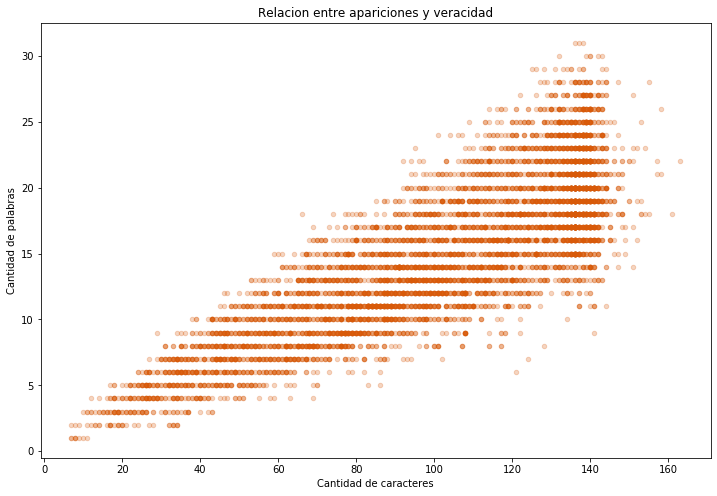

In [20]:
color = cmap(0.7)
tweets_largo.plot.scatter('nºcaracteres','nºpalabras', title='Relacion entre apariciones y veracidad',alpha=0.25,figsize=(12,8), color = color);
ax=plt.gca()
ax.set_xlabel('Cantidad de caracteres')
ax.set_ylabel('Cantidad de palabras');

#### se observa lo esperado

#### Relacion entre veracidad y largo en caracteres.

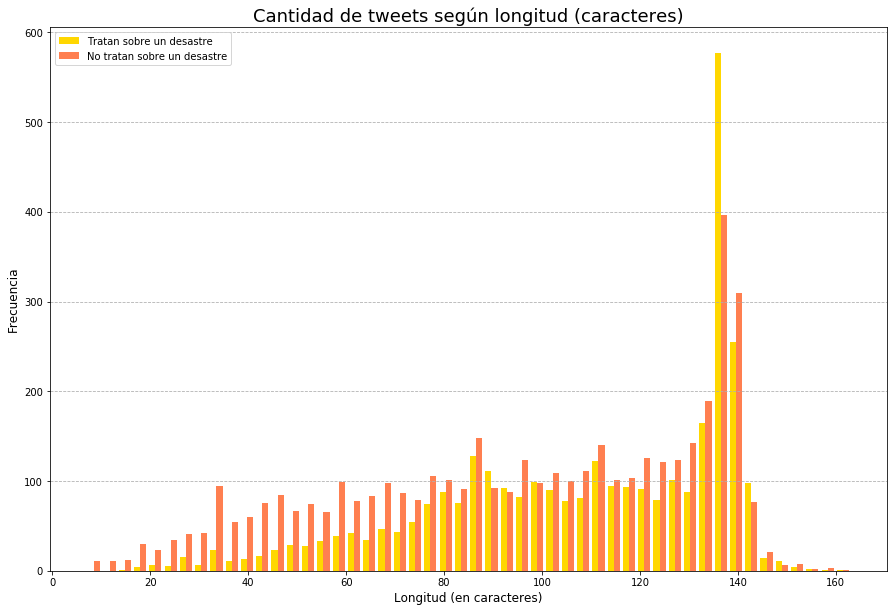

In [21]:
colores = cmap([0.7,0.4])
tweets_clima = tweets_largo[tweets_largo['target']==True]['nºcaracteres']
tweets_no_clima = tweets_largo[tweets_largo['target']==False]['nºcaracteres']
plt.figure(figsize=(15,10))
# histogram
plt.hist([tweets_clima, tweets_no_clima], bins=50, color=['gold','coral'], \
label=['Tratan sobre un desastre', "No tratan sobre un desastre"])
plt.title("Cantidad de tweets según longitud (caracteres)", fontsize=18)
plt.ylabel("Frecuencia", fontsize=12)
plt.xlabel("Longitud (en caracteres)", fontsize=12)
plt.legend(prop={'size': 10})
plt.grid(b=True, axis='y', linestyle='--')

#### Hago lo mismo pero con palabras

In [22]:
tweets_largo['intervalo de palabras']=pd.cut(tweets_largo['nºpalabras'], bins=[0,5,10,15,20,25,31], include_lowest=True)

tweets_largo

,nºcaracteres,nºpalabras,target,intervalo de palabras
0,69,13,1,"(10.0, 15.0]"
1,38,7,1,"(5.0, 10.0]"
2,133,22,1,"(20.0, 25.0]"
3,65,8,1,"(5.0, 10.0]"
4,88,16,1,"(15.0, 20.0]"
...,...,...,...,...
7608,83,11,1,"(10.0, 15.0]"
7609,125,20,1,"(15.0, 20.0]"
7610,65,8,1,"(5.0, 10.0]"
7611,137,19,1,"(15.0, 20.0]"


In [23]:
tweets_largo = tweets_largo.groupby(['intervalo de palabras']).agg({'target':['mean','count','sum']})

In [24]:
level0 = tweets_largo.columns.get_level_values(0)
level1 = tweets_largo.columns.get_level_values(1)
tweets_largo.columns = level0 + '_' + level1

In [25]:
tweets_largo

,target_mean,target_count,target_sum
intervalo de palabras,,,
"(-0.001, 5.0]",0.204604,391,80
"(5.0, 10.0]",0.394922,1418,560
"(10.0, 15.0]",0.467294,2232,1043
"(15.0, 20.0]",0.486148,2238,1088
"(20.0, 25.0]",0.401617,1113,447
"(25.0, 31.0]",0.239819,221,53


In [26]:
tweets_largo.rename({'target_mean': 'ratio_veraces', 'target_count': 'tweets totales','target_sum':'Tratan sobre un desastre'}, axis=1, inplace=True)

In [27]:
tweets_largo['No tratan sobre un desastre'] = tweets_largo['tweets totales'] - tweets_largo['Tratan sobre un desastre']

In [28]:
tweets_largo

,ratio_veraces,tweets totales,Tratan sobre un desastre,No tratan sobre un desastre
intervalo de palabras,,,,
"(-0.001, 5.0]",0.204604,391,80,311
"(5.0, 10.0]",0.394922,1418,560,858
"(10.0, 15.0]",0.467294,2232,1043,1189
"(15.0, 20.0]",0.486148,2238,1088,1150
"(20.0, 25.0]",0.401617,1113,447,666
"(25.0, 31.0]",0.239819,221,53,168


In [29]:
del tweets_largo['ratio_veraces']
del tweets_largo ['tweets totales']
tweets_largo

,Tratan sobre un desastre,No tratan sobre un desastre
intervalo de palabras,,
"(-0.001, 5.0]",80,311
"(5.0, 10.0]",560,858
"(10.0, 15.0]",1043,1189
"(15.0, 20.0]",1088,1150
"(20.0, 25.0]",447,666
"(25.0, 31.0]",53,168


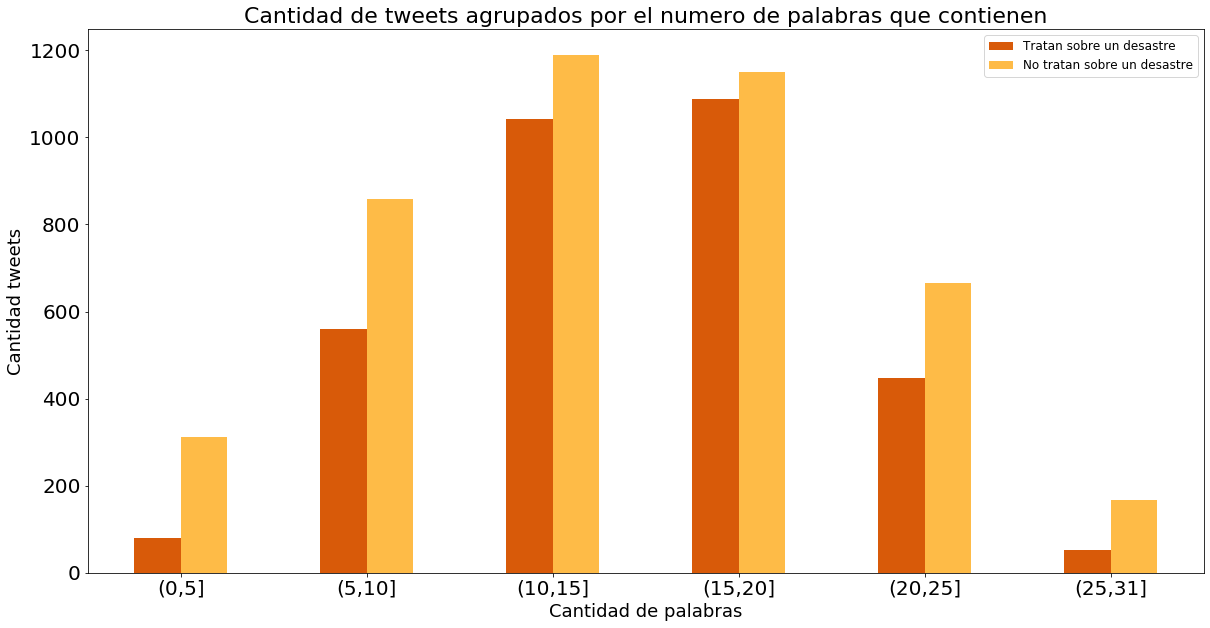

In [30]:
colores = cmap([0.7,0.4])
barra_duo = tweets_largo.plot.bar(color=colores,figsize = (20,10))
barra_duo.set_title("Cantidad de tweets agrupados por el numero de palabras que contienen",fontsize = 22)
barra_duo.set_xlabel("Cantidad de palabras", fontsize = 18)
barra_duo.set_ylabel("Cantidad tweets", fontsize = 18)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
barra_duo.set_xticklabels( ["(0,5]","(5,10]","(10,15]","(15,20]","(20,25]","(25,31]"] );
barra_duo.legend(fontsize = 12)

## Palabras que tienen mas ocurrencias en tweets.

#### Procedo a crear un nuevo dataframe, donde levanto cada palabra junto con su target y id de tweet.

In [31]:
palabras = tweets.explode('palabras')
del(palabras['text'])
del(palabras['nºcaracteres'])
del(palabras['nºpalabras'])
palabras.rename({'palabras': 'palabra', 'id': 'id_tweet','target': 'target_tweet' }, axis=1, inplace=True)
palabras.reset_index(inplace = True, drop = True)
palabras.head()

,id_tweet,palabra,target_tweet
0,1,Our,1
1,1,Deeds,1
2,1,are,1
3,1,the,1
4,1,Reason,1


#### En el analisis no voy a discrimnar por mayusculas, paso todo a minuscula.

In [32]:
palabras['palabra'] = palabras['palabra'].str.lower()
palabras.head()

,id_tweet,palabra,target_tweet
0,1,our,1
1,1,deeds,1
2,1,are,1
3,1,the,1
4,1,reason,1


#### Hay casos donde la palabra empieza con un caracter especial, ejemplo de #.

In [33]:
palabras.iloc[7]

id_tweet                  1
palabra         #earthquake
target_tweet              1
Name: 7, dtype: object

#### Yo quiero eliminar dichos caracteres, ya que en el caso que se encuentren ""#earthquake" y "earthquake" busco que cuenten como la misma palabra. 

In [34]:
import re
palabras_limpias = []
for palabra in palabras['palabra']:
    palabra_limpia = re.sub('[^A-Za-z0-9]+','', palabra)
    palabras_limpias.append(palabra_limpia)

In [35]:
palabras['palabra']=palabras_limpias

In [36]:
palabras.iloc[7]

id_tweet                 1
palabra         earthquake
target_tweet             1
Name: 7, dtype: object

#### Ahora ya borramos los caracteres especiales, el siguiente paso es borrar las palabras que aparecen 2 veces en un tweet. Esto es para que las ocurrencias no cuenten doble.


In [37]:
palabras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113461 entries, 0 to 113460
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_tweet      113461 non-null  int64 
 1   palabra       113461 non-null  object
 2   target_tweet  113461 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ MB


In [38]:
palabras.drop_duplicates(subset=['palabra','id_tweet'], keep="first", inplace = True)
palabras.reset_index(inplace = True, drop = True)

In [39]:
palabras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107617 entries, 0 to 107616
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_tweet      107617 non-null  int64 
 1   palabra       107617 non-null  object
 2   target_tweet  107617 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


#### Ya fueron eliminadas las palabras repetidas de cada tweet, todo listo para el analisis

In [40]:
agrupadas=palabras.groupby(['palabra']).agg({'target_tweet':['mean','count','sum']})
agrupadas.sample(3)

target_tweet          
                 mean count sum
palabra                        
sms               0.0     1   0
freefrom          1.0     1   1
msfsea            1.0     1   1

#### En este caso sum son las veces que la palabra aparece en tweets veridicos.(ya que el true esta representado con un uno)

#### Aplano el level de las columnas.

In [41]:
level0 = agrupadas.columns.get_level_values(0)
level1 = agrupadas.columns.get_level_values(1)
agrupadas.columns = level0 + '_' + level1

In [42]:
agrupadas.sample(3)

,target_tweet_mean,target_tweet_count,target_tweet_sum
palabra,,,
wendell,1.0,1,1
httptcomulruifnn1,0.0,1,0
httptco0pamznyyuw,0.0,1,0


#### Renombro 

In [43]:
agrupadas.rename({'target_tweet_mean': 'porcentaje_veraces', 'target_tweet_count': 'apariciones_totales','target_tweet_sum':'apariciones_veraces'}, axis=1, inplace=True)

In [44]:
agrupadas.sample(3)

,porcentaje_veraces,apariciones_totales,apariciones_veraces
palabra,,,
gold,0.333333,12,4
ltlt,0.500000,2,1
stury,1.000000,1,1


#### Transformo el ratio en porcentaje

In [45]:
agrupadas['porcentaje_veraces'] = agrupadas['porcentaje_veraces']*100

In [46]:
agrupadas.sample(3)

,porcentaje_veraces,apariciones_totales,apariciones_veraces
palabra,,,
japans,100.0,5,5
httpstcopqslug4jk5,0.0,1,0
httptcohkyfkug5zw,0.0,1,0


##### Agrego una columna de apariciones_falaces

In [47]:
agrupadas['apariciones_falaces'] = (agrupadas['apariciones_totales'] - agrupadas['apariciones_veraces'])

In [48]:
agrupadas.sample(3)

,porcentaje_veraces,apariciones_totales,apariciones_veraces,apariciones_falaces
palabra,,,,
httptcouwobuuw2mk,0.0,1,0,1
reduced,40.0,5,2,3
httptco9fxmn0l0bd,100.0,1,1,0


#### Considero que las palabras que aparecen menos del 0.2% de los tweets son irrelevantes para este analisis. Suelen ser 'one hit'

In [49]:
agrupadas.info() #palabras previo a filtrar

<class 'pandas.core.frame.DataFrame'>
Index: 22365 entries,  to zzzz
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   porcentaje_veraces   22365 non-null  float64
 1   apariciones_totales  22365 non-null  int64  
 2   apariciones_veraces  22365 non-null  int64  
 3   apariciones_falaces  22365 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 873.6+ KB


In [50]:
minimo_de_ocurrencias = (0.2/100)*len(tweets.index)
minimo_de_ocurrencias

15.226

In [51]:
agrupadas = agrupadas.loc[agrupadas[('apariciones_totales')]>minimo_de_ocurrencias,:]

In [52]:
agrupadas.info() #palabras despues de filtrar

<class 'pandas.core.frame.DataFrame'>
Index: 1038 entries,  to zone
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   porcentaje_veraces   1038 non-null   float64
 1   apariciones_totales  1038 non-null   int64  
 2   apariciones_veraces  1038 non-null   int64  
 3   apariciones_falaces  1038 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 40.5+ KB


In [53]:
#### Cuales son las palabras que mas se repiten?

In [54]:
agrupadas.sort_values(by=['apariciones_totales'], ascending=[False], inplace = True)

In [55]:
agrupadas.head(7)

,porcentaje_veraces,apariciones_totales,apariciones_veraces,apariciones_falaces
palabra,,,,
the,42.331542,2419,1024,1395
in,57.543466,1783,1026,757
a,42.270939,1779,752,1027
to,39.976484,1701,680,1021
,41.977501,1689,709,980
of,50.364520,1646,829,817
and,36.434715,1279,466,813


In [56]:
####dropeo los espacio en blanco
agrupadas = agrupadas.drop('')
agrupadas.head(100)
len(agrupadas)

1037

#### Grafico las 30 palabras mas repetidas

In [57]:
agrupadas_mas_repetidas = agrupadas.head(30)

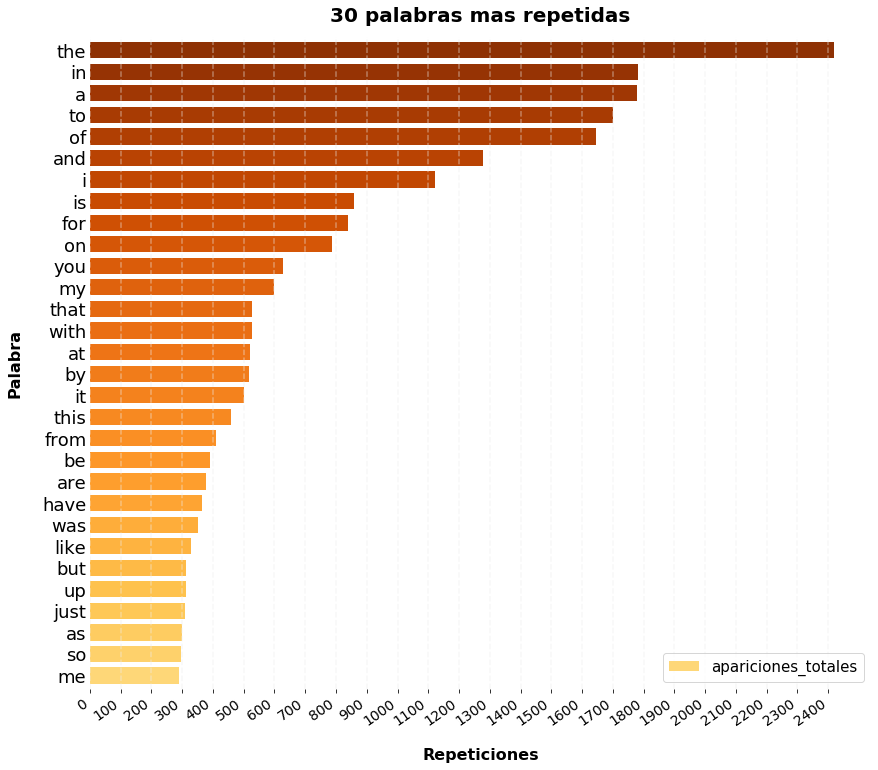

In [58]:
saltos = np.linspace(0.3, 0.9, 30)
colores = cmap(saltos)

maximo = agrupadas_mas_repetidas['apariciones_totales'].max()

grafico = agrupadas_mas_repetidas.sort_values("apariciones_totales").plot(kind='barh', figsize=(14,12), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 100), rotation=35,fontsize=14,ha='right')
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

    plt.title("30 palabras mas repetidas", weight='bold', size=20, pad=15)
grafico.legend(fontsize = 15)

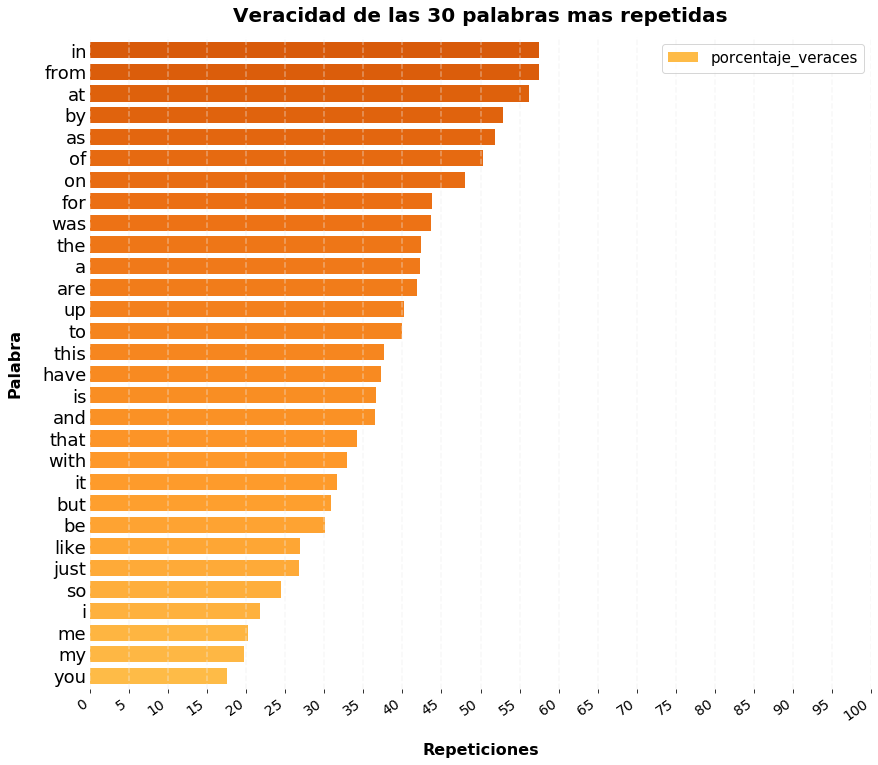

In [59]:
saltos = np.linspace(0.4, 0.7, 30)
colores = cmap(saltos)

#maximo = agrupadas_mas_repetidas['apariciones_totales'].max()
maximo = 100

grafico = agrupadas_mas_repetidas.sort_values("porcentaje_veraces").plot(kind='barh', figsize=(14,12), y ='porcentaje_veraces', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 5), rotation=35,fontsize=14,ha='right')
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Veracidad de las 30 palabras mas repetidas", weight='bold', size=20, pad=15)
grafico.legend(fontsize = 15)

#### Ordeno segun porcentaje de veracidad y apariciones totales.

In [60]:
agrupadas.sort_values(by=['porcentaje_veraces', 'apariciones_totales'], ascending=[False, False], inplace = True)

In [61]:
agrupadas.head()

,porcentaje_veraces,apariciones_totales,apariciones_veraces,apariciones_falaces
palabra,,,,
mh370,100.0,69,69,0
northern,100.0,64,64,0
debris,100.0,49,49,0
severe,100.0,44,44,0
derailment,100.0,40,40,0


#### Reordeno columnas

In [62]:
agrupadas = agrupadas[['apariciones_veraces', 'apariciones_falaces', 'apariciones_totales', 'porcentaje_veraces']]
agrupadas.head()

,apariciones_veraces,apariciones_falaces,apariciones_totales,porcentaje_veraces
palabra,,,,
mh370,69,0,69,100.0
northern,64,0,64,100.0
debris,49,0,49,100.0
severe,44,0,44,100.0
derailment,40,0,40,100.0


### Me armo mi array de colores 

In [63]:
saltos = np.linspace(0.3, 0.7, 20)
colores = cmap(saltos)


#### Como se distrubuyen las palabras a lo largo del porcentaje de veracidad? donde se concentran mas?

<Figure size 1152x864 with 0 Axes>

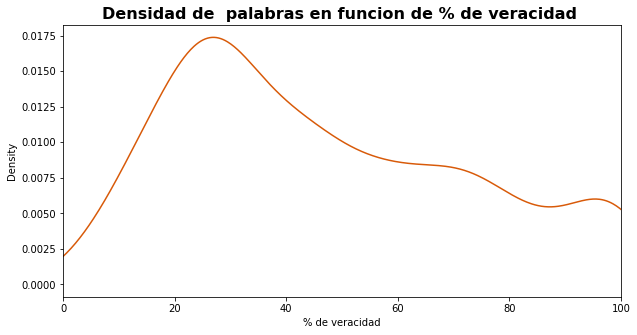

In [64]:
plt.figure(figsize= (16,12) )
color = tuple( colores[19] )
fig=plt.figure()
ax = fig.add_subplot(111)
plt.xlim(0,100)
plt.title('Densidad de  palabras en funcion de % de veracidad ',fontsize=16,fontweight='bold')
ax.set_xlabel('% de veracidad')
agrupadas['porcentaje_veraces'].plot.kde(color = color , figsize=(10, 5));

Text(0.5, 1.0, 'Cantidad de palabras por porcentaje de veracidad')

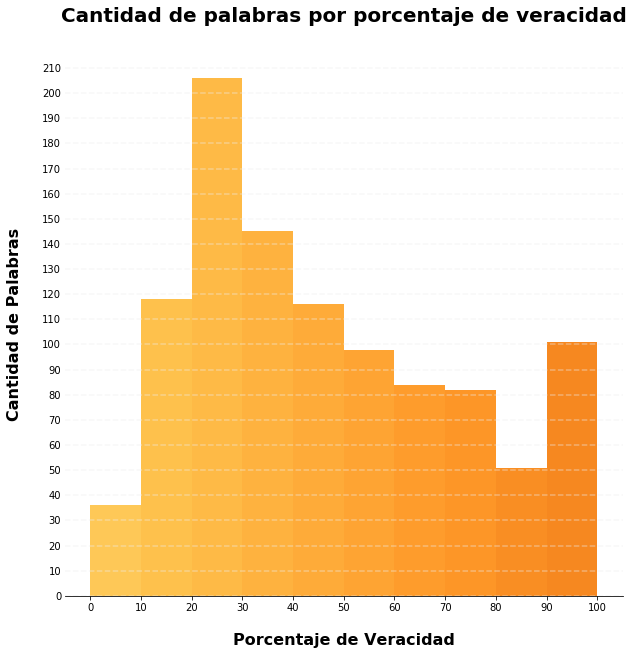

In [65]:
plt.figure(figsize=(10,10))    
n, bins, patches = plt.hist(agrupadas["porcentaje_veraces"], bins=10, color="c")
hist_porcentajes = plt.gca()

for i,p in enumerate(patches):
    plt.setp(p, "facecolor", colores[i+3])

plt.xticks(np.arange(0, 100+1, 10.0))
plt.yticks(np.arange(0, 210+1, 10.0))
plt.tick_params(axis='y', length=0)

hist_porcentajes.spines['right'].set_visible(False)
hist_porcentajes.spines['top'].set_visible(False)
hist_porcentajes.spines['left'].set_visible(False)

lineas = hist_porcentajes.get_yticks()
for i in lineas:
      hist_porcentajes.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
hist_porcentajes.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
hist_porcentajes.set_ylabel("Cantidad de Palabras", labelpad=20, weight='bold', size=16)

plt.title("Cantidad de palabras por porcentaje de veracidad", weight='bold', size=20, pad=30)

#### Con esto se puede observar que en aproximadamente entre el 20% 30% de la veracidad es donde se asocian mas palabras diferentes. Esto es debido a que suelen haber mas tweets verdaderos que falsos, por lo tanto es esperable que el pico este desviado hacia la izquierda del 50%.

#### Ahora veo como se distribuyen las palabras en funciona su % de veracidad y sus repeticiones.

In [66]:
agrupadas.head(100)

,apariciones_veraces,apariciones_falaces,apariciones_totales,porcentaje_veraces
palabra,,,,
mh370,69,0,69,100.000000
northern,64,0,64,100.000000
debris,49,0,49,100.000000
severe,44,0,44,100.000000
derailment,40,0,40,100.000000
...,...,...,...,...
plane,30,3,33,90.909091
officer,20,2,22,90.909091
pm,58,6,64,90.625000


#### Se puede observar que hay mucha palabras con el mas de 0.2 % de apariciones que tienen 100 de veracidad, observo como se relaciona la veracidad una palabra en relacion con la cantidad de repeticiones de la misma.

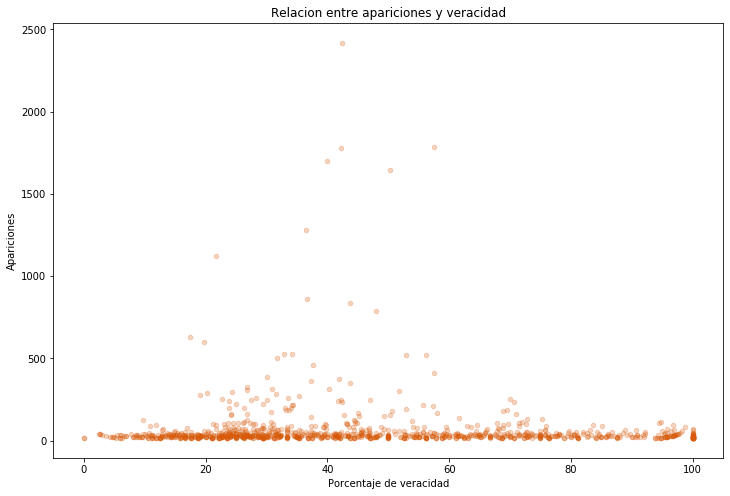

In [67]:
agrupadas.plot.scatter('porcentaje_veraces','apariciones_totales', title='Relacion entre apariciones y veracidad',alpha=0.25,figsize=(12,8), color = color);
ax=plt.gca()
ax.set_ylabel('Apariciones')
ax.set_xlabel('Porcentaje de veracidad');

#### Parece haber muy pocas palabras con mas de 500 apariciones, y como es obvio las que lo cumplen tienden a rondar el 50% de veracidad. Elimino estas al no tener relevancia en el analisis.


In [68]:
agrupadas_short = agrupadas.loc[agrupadas[('apariciones_totales')]<500,:]

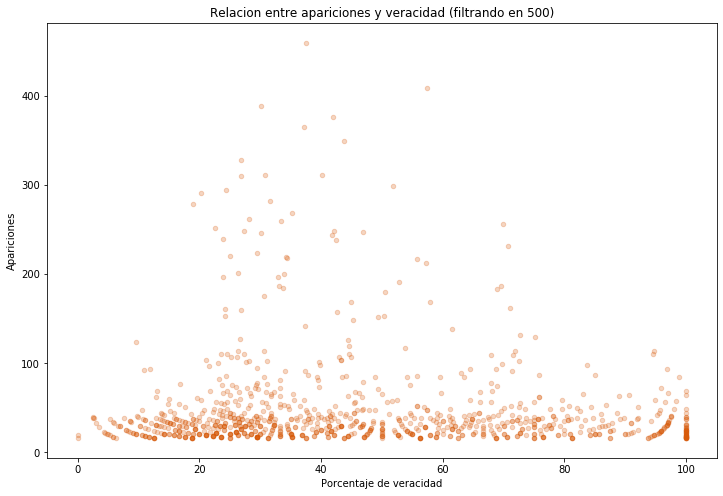

In [69]:
agrupadas_short.plot.scatter('porcentaje_veraces','apariciones_totales', title='Relacion entre apariciones y veracidad (filtrando en 500)',alpha=0.25,figsize=(12,8), color = color);
ax=plt.gca();
ax=plt.gca()
ax.set_ylabel('Apariciones')
ax.set_xlabel('Porcentaje de veracidad');

#### Se sigue demostrando una gran acumulacion debajo de las 100 apariciones, vuelvo a filtrar.

In [70]:
agrupadas_short = agrupadas.loc[agrupadas[('apariciones_totales')]<100,:]

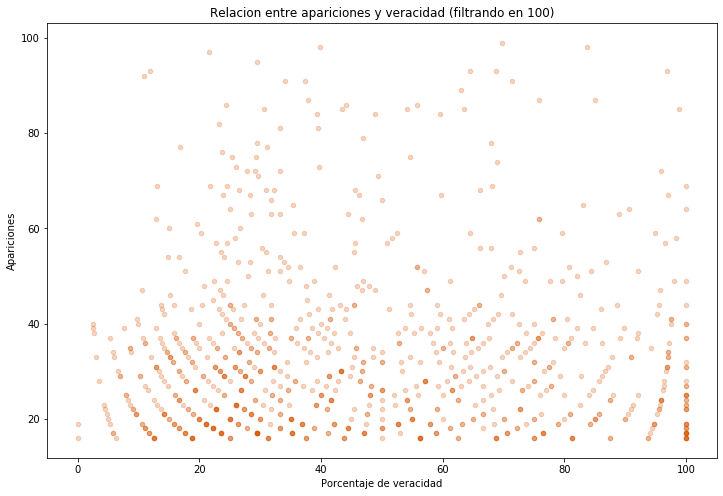

In [71]:
agrupadas_short.plot.scatter('porcentaje_veraces','apariciones_totales', title='Relacion entre apariciones y veracidad (filtrando en 100)',alpha=0.25,figsize=(12,8), color = color);
ax=plt.gca()
ax.set_ylabel('Apariciones')
ax.set_xlabel('Porcentaje de veracidad');

#### EXPLICAR PORQUE EL GRAFICO TIENE ESAS COSAS REDONDITAS.

#### Como es de esperarse vemos una agrupacion de muchas palabras en 100% de veracidad, esto se debe a que la muestra no es suficientemente grande. 

#### Luego se puede observar que al buscar palabras con mayo numero de apariciones, el procentaje de veracidad se encuentra alrededor del 50%.

#### Cantidad de apariciones con 100% de veracidad

In [72]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]==100,:]

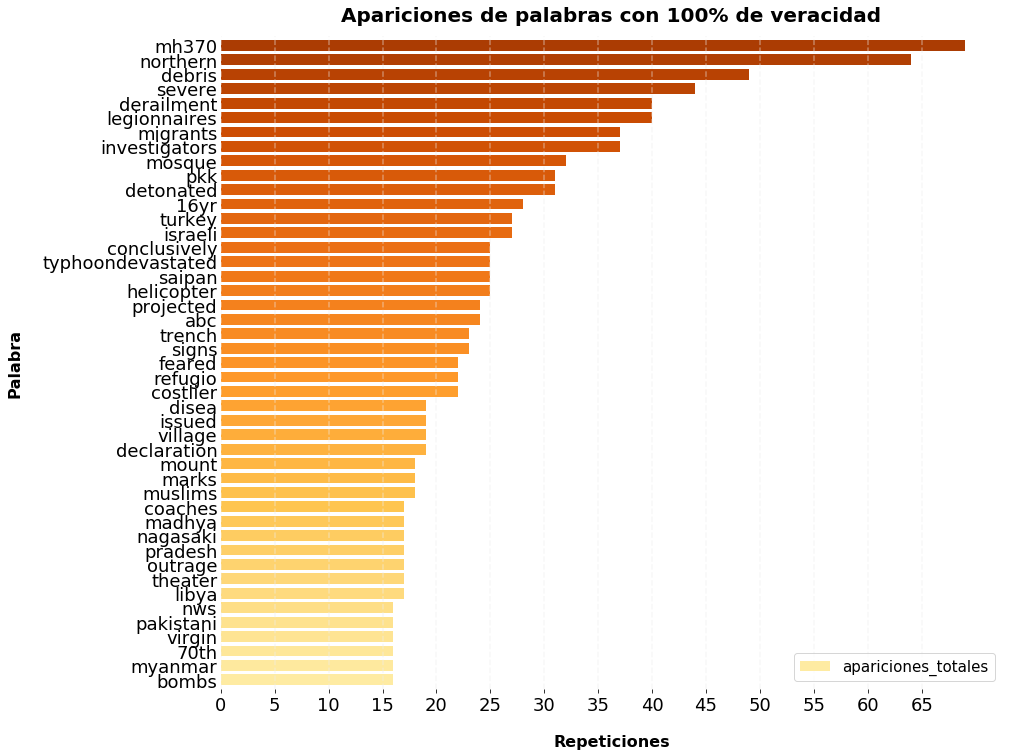

In [73]:
saltos = np.linspace(0.2, 0.9, 50)
colores = cmap(saltos)

maximo = agrupadas_short['apariciones_totales'].max()

grafico = agrupadas_short.sort_values("apariciones_totales").plot(kind='barh', figsize=(14,12), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 5))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Apariciones de palabras con 100% de veracidad", weight='bold', size=20, pad=15)
grafico.legend(fontsize = 15)

#### Quiero graficar todas las palabras que tienen por lo menos un 90% de veracidad, me parece algo interesante.

In [74]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]>=90,:]
agrupadas_short.head()

,apariciones_veraces,apariciones_falaces,apariciones_totales,porcentaje_veraces
palabra,,,,
mh370,69,0,69,100.0
northern,64,0,64,100.0
debris,49,0,49,100.0
severe,44,0,44,100.0
derailment,40,0,40,100.0


In [75]:
agrupadas_short.info()


<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, mh370 to east
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   apariciones_veraces  101 non-null    int64  
 1   apariciones_falaces  101 non-null    int64  
 2   apariciones_totales  101 non-null    int64  
 3   porcentaje_veraces   101 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.9+ KB


#### Tengo 100 items, un wordcloud es una buena idea. El tamaño va asociado a la cantidad de repeticiones, el color a el % de veracidad.

In [76]:
color_wordcloud = cmap(np.linspace(0.4, .9,101))
colores_rgb = ()
for i in color_wordcloud:
    #convierto rgba en rgb
    aux = list(i)
    del aux[3]
    aux = (int(x * 255) for x in aux)
    aux =tuple(aux)
    colores_rgb = colores_rgb + (aux,)
    


In [77]:
#cosa de mandinga, no tocar    
def my_tf_color_func_mayor_veracidad(dictionary):
  def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
    return colores_rgb[int ( (dictionary[word]-90)*10) ]
  return my_tf_color_func_inner   

In [78]:
indices = list(agrupadas_short.index)
valores = list(agrupadas_short['apariciones_totales'])
todas_las_palabras = list()

In [79]:
for i in range( len(indices) ):
    for j in range ( valores[i] ):
        todas_las_palabras.append(indices[i])

In [80]:
todas_las_palabras = pd.Series(todas_las_palabras).to_string()

In [81]:
mask = np.array(Image.open("../TP1-Organizacion-de-Datos/imagenes/ovalo.png"))

In [82]:
keys = {}
veracidades = agrupadas_short['porcentaje_veraces'].tolist()

for i in range(len(indices)):
    keys[indices[i]] = veracidades[i]


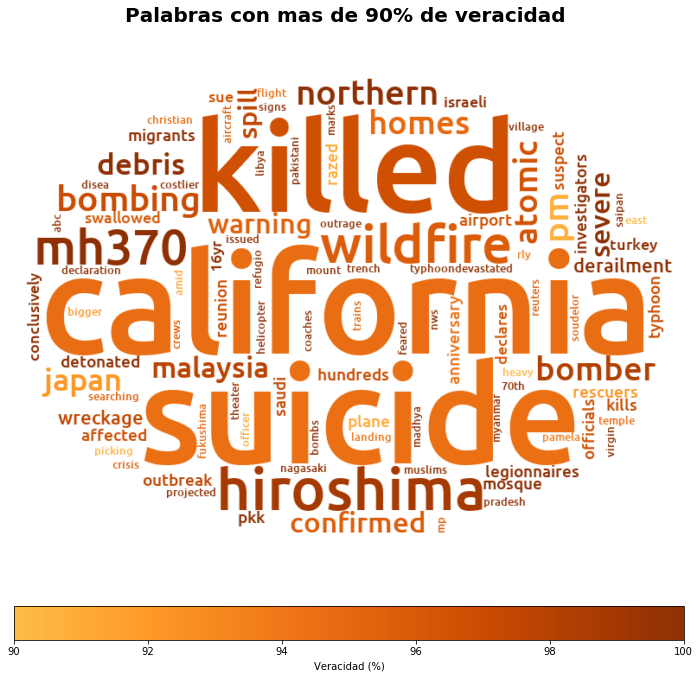

In [83]:
plt.figure(figsize= (16,12) )
wordcloud = WordCloud(font_path='../fonts/truetype/ubuntu/Ubuntu-M.ttf',collocations=False, colormap=cmap, \
                      relative_scaling=0.5, background_color='white', width=800, height=200, \
                      color_func=my_tf_color_func_mayor_veracidad(keys), normalize_plurals=False, mask=mask, prefer_horizontal=0.5).generate(todas_las_palabras)

topes = mpl.colors.Normalize(vmin=90, vmax=100)
cmap_wordcloud = ListedColormap(cmap(np.linspace(0.4, 0.9, 256)))

plt.imshow(wordcloud, interpolation='bilinear')
plt.colorbar(cm.ScalarMappable(norm=topes, cmap=cmap_wordcloud), label='Veracidad (%)', \
             orientation='horizontal', shrink=0.75, pad=0.05)
plt.axis("off")
plt.title("Palabras con mas de 90% de veracidad ", weight='bold', size=20, pad=30)
plt.show()

#### Ahora voy a analisar, las palabras que tienden a ser menos veraces.

In [84]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]==0,:]
agrupadas_short.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, aftershock to lmao
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   apariciones_veraces  2 non-null      int64  
 1   apariciones_falaces  2 non-null      int64  
 2   apariciones_totales  2 non-null      int64  
 3   porcentaje_veraces   2 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 80.0+ bytes


Text(0.5, 1.0, 'Apariciones de palabras con 0% de veracidad')

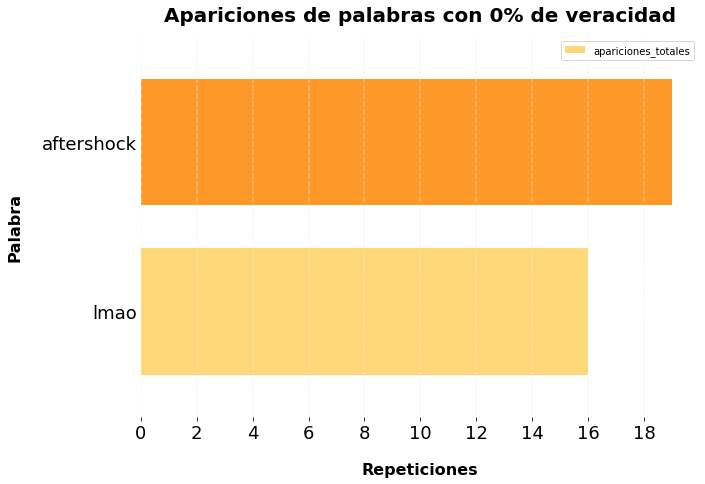

In [85]:
saltos = np.linspace(0.3, 0.5, 2)
colores = cmap(saltos)

maximo = agrupadas_short['apariciones_totales'].max()

grafico = agrupadas_short.sort_values("apariciones_totales").plot(kind='barh', figsize=(10,7), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 2))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Apariciones de palabras con 0% de veracidad", weight='bold', size=20, pad=15)

In [86]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]<=5,:]
agrupadas_short.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, mayhem to lmao
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   apariciones_veraces  11 non-null     int64  
 1   apariciones_falaces  11 non-null     int64  
 2   apariciones_totales  11 non-null     int64  
 3   porcentaje_veraces   11 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 440.0+ bytes


Text(0.5, 1.0, 'Apariciones de palabras por debajo del 5% de veracidad')

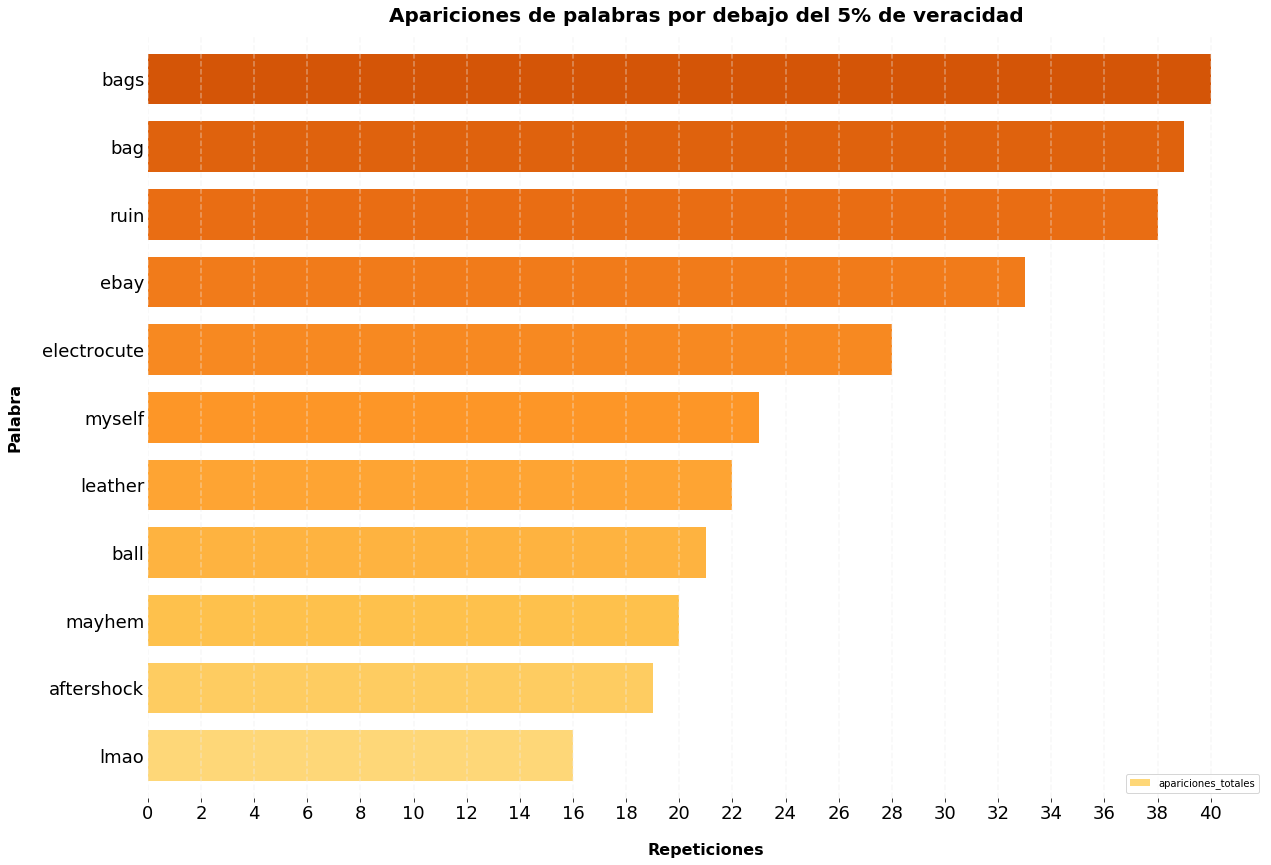

In [87]:
saltos = np.linspace(0.3, 0.8, 13)
colores = cmap(saltos)

maximo = agrupadas_short['apariciones_totales'].max()

grafico = agrupadas_short.sort_values("apariciones_totales").plot(kind='barh', figsize=(20,14), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 2))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Apariciones de palabras por debajo del 5% de veracidad", weight='bold', size=20, pad=15)

#### Estudiemos el 10%, buscando mas palabras

In [88]:
agrupadas_short = agrupadas.loc[agrupadas[('porcentaje_veraces')]<=10,:]
agrupadas_short.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, explode to lmao
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   apariciones_veraces  37 non-null     int64  
 1   apariciones_falaces  37 non-null     int64  
 2   apariciones_totales  37 non-null     int64  
 3   porcentaje_veraces   37 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.4+ KB


#### Tengo 37 elementos por debajo del 10%, hago un bar plot.

Text(0.5, 1.0, 'Apariciones de palabras por debajo del 10% de veracidad')

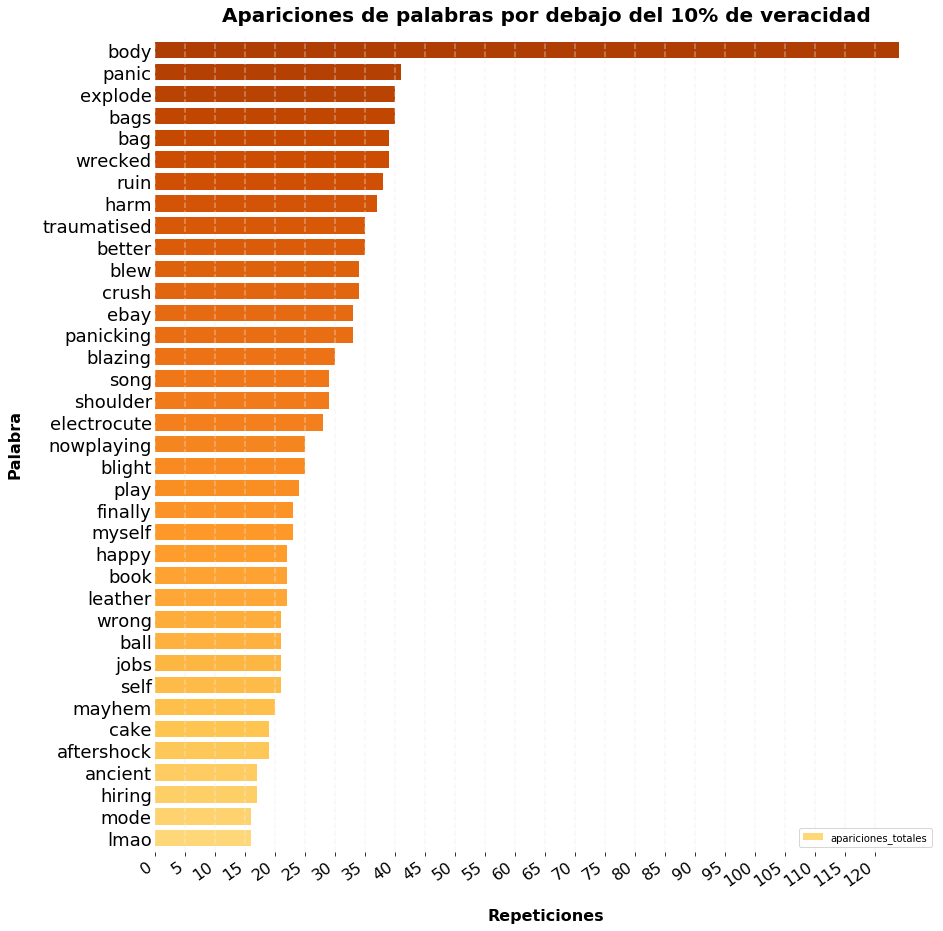

In [89]:
saltos = np.linspace(0.3, 0.88, 41)
colores = cmap(saltos)

def my_tf_color_func_mayor_veracidad(dictionary):
  def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
    return colores_rgb[int ( dictionary[word]*4) ]
  return my_tf_color_func_inner


maximo = agrupadas_short['apariciones_totales'].max()

grafico = agrupadas_short.sort_values("apariciones_totales").plot(kind='barh', figsize=(14,15), y ='apariciones_totales', color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 5),rotation=35,fontsize=16,ha='right')
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Apariciones de palabras por debajo del 10% de veracidad", weight='bold', size=20, pad=15)

#### Palabras con 10% de apariciones

In [90]:
indices = list(agrupadas_short.index)
valores = list(agrupadas_short['apariciones_totales'])
todas_las_palabras = list()

for i in range( len(indices) ):
    for j in range ( valores[i] ):
        todas_las_palabras.append(indices[i])
        
todas_las_palabras = pd.Series(todas_las_palabras).to_string()

keys = {}
veracidades = agrupadas_short['porcentaje_veraces'].tolist()

for i in range(len(indices)):
    keys[indices[i]] = veracidades[i]


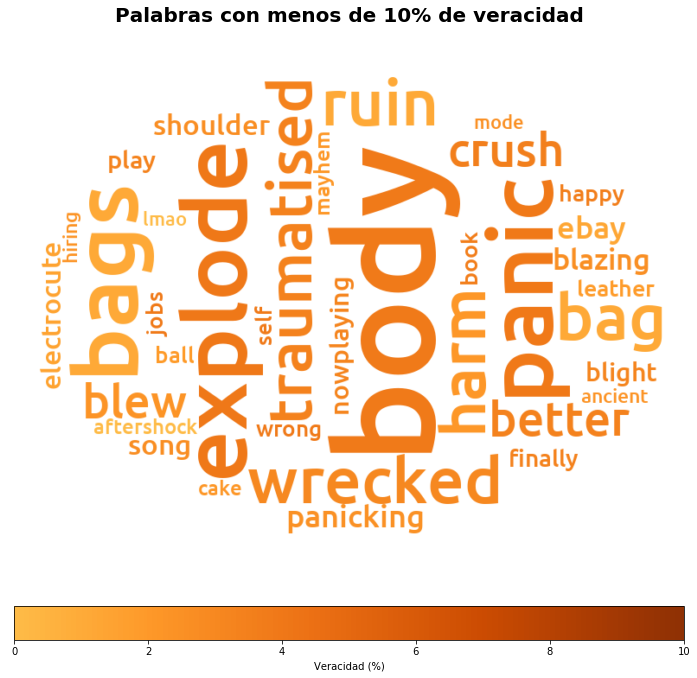

In [91]:
color_wordcloud = cmap(np.linspace(0.4, .9, 39))


plt.figure(figsize= (16,12) )
wordcloud = WordCloud(font_path='../fonts/truetype/ubuntu/Ubuntu-M.ttf',collocations=False, colormap=cmap, \
                      relative_scaling=0.5, background_color='white', width=800, height=200, \
                      color_func=my_tf_color_func_mayor_veracidad(keys), normalize_plurals=False, mask=mask, prefer_horizontal=0.5).generate(todas_las_palabras)

topes = mpl.colors.Normalize(vmin=0, vmax=10)
cmap_wordcloud = ListedColormap(cmap(np.linspace(0.4, 0.9, 256)))

plt.imshow(wordcloud, interpolation='bilinear')
plt.colorbar(cm.ScalarMappable(norm=topes, cmap=cmap_wordcloud), label='Veracidad (%)', \
             orientation='horizontal', shrink=0.75, pad=0.05)
plt.axis("off")
plt.title("Palabras con menos de 10% de veracidad", weight='bold', size=20, pad=30)
plt.show()

### extra -> wordcloud de las palabras que mas se repiten

In [92]:
agrupadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037 entries, mh370 to lmao
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   apariciones_veraces  1037 non-null   int64  
 1   apariciones_falaces  1037 non-null   int64  
 2   apariciones_totales  1037 non-null   int64  
 3   porcentaje_veraces   1037 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 80.5+ KB


In [93]:
indices = list(agrupadas.index)
valores = list(agrupadas['apariciones_totales'])
todas_las_palabras = list()

for i in range( len(indices) ):
    for j in range ( valores[i] ):
        todas_las_palabras.append(indices[i])
        
todas_las_palabras = pd.Series(todas_las_palabras).to_string()


In [94]:
len(todas_las_palabras)

1788452

In [95]:
type(STOPWORDS)

set

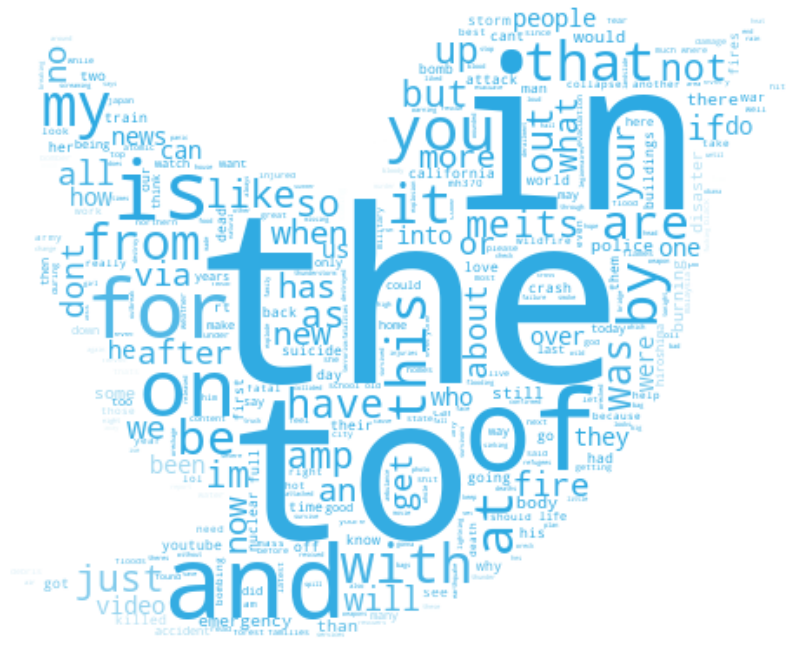

In [96]:
mask = np.array(Image.open("imagenes/twitter.jpg"))
wordcloud_bandera = WordCloud(stopwords=[""], collocations=False,background_color="white", mode="RGBA", max_words=1000, mask=mask, normalize_plurals=False).generate(todas_las_palabras)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[14,14])
plt.imshow(wordcloud_bandera.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.savefig("imagenes/palabras_con_wordstops.png", format="png")

plt.show()

#### filtrando por stopword (prepositions)

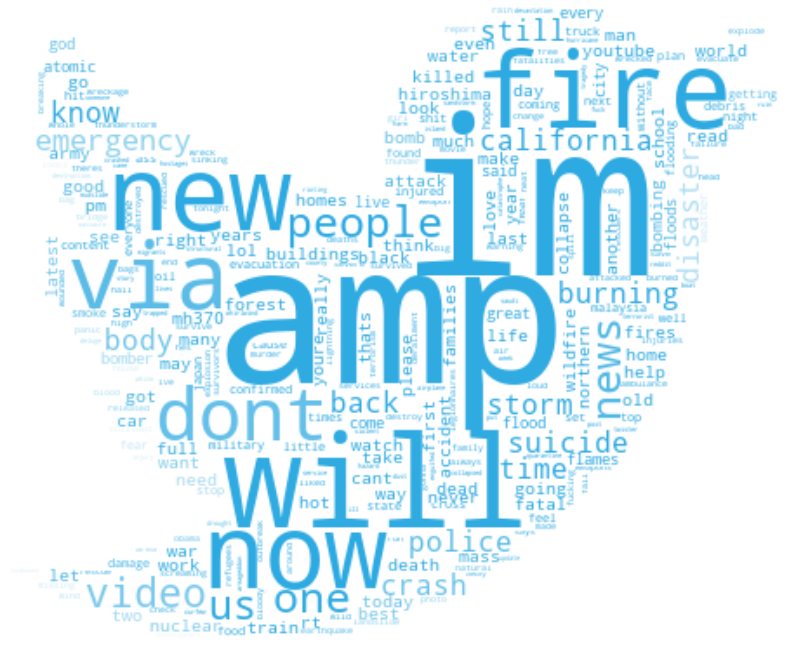

In [97]:
mask = np.array(Image.open("imagenes/twitter.jpg"))
wordcloud_bandera = WordCloud(stopwords=STOPWORDS, collocations=False,background_color="white", mode="RGBA", max_words=1000, mask=mask, normalize_plurals=False).generate(todas_las_palabras)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[14,14])
plt.imshow(wordcloud_bandera.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.savefig("imagenes/palabras_sin_wordstops.png", format="png")

plt.show()

### longitud palabra promedio

In [98]:
agrupadas.head()

,apariciones_veraces,apariciones_falaces,apariciones_totales,porcentaje_veraces
palabra,,,,
mh370,69,0,69,100.0
northern,64,0,64,100.0
debris,49,0,49,100.0
severe,44,0,44,100.0
derailment,40,0,40,100.0


In [99]:
type(agrupadas.index[1])

str

In [100]:
agrupadas['largo'] = agrupadas.index.str.len()

In [101]:
agrupadas.head()

,apariciones_veraces,apariciones_falaces,apariciones_totales,porcentaje_veraces,largo
palabra,,,,,
mh370,69,0,69,100.0,5
northern,64,0,64,100.0,8
debris,49,0,49,100.0,6
severe,44,0,44,100.0,6
derailment,40,0,40,100.0,10


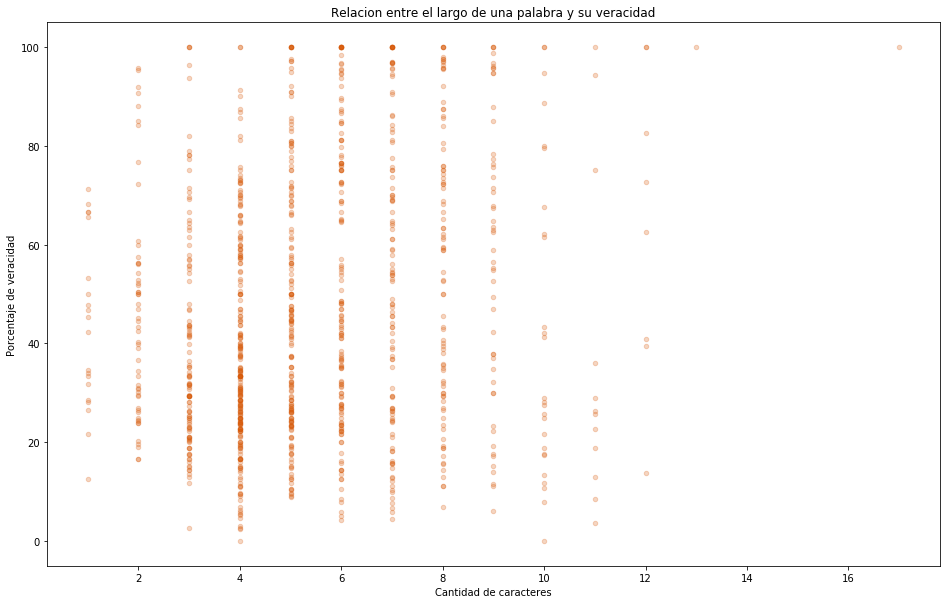

In [102]:
color = cmap(0.7)
agrupadas.plot.scatter('largo','porcentaje_veraces', title='Relacion entre el largo de una palabra y su veracidad',alpha=0.25,figsize=(16,10), color = color);
ax=plt.gca()
ax.set_xlabel('Cantidad de caracteres')
ax.set_ylabel('Porcentaje de veracidad');

#### Ver la longitud promedio de las palabras

In [103]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            7613 non-null   int64 
 1   text          7613 non-null   object
 2   palabras      7613 non-null   object
 3   nºcaracteres  7613 non-null   int64 
 4   nºpalabras    7613 non-null   int64 
 5   target        7613 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 357.0+ KB


In [104]:
tweets.head()

,id,text,palabras,nºcaracteres,nºpalabras,target
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,13,1
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,7,1
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,22,1
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,8,1
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,16,1


In [105]:
tweets['long_promedio_palabra'] = (tweets['nºcaracteres']/tweets['nºpalabras'])

In [112]:
tweets.sample(3)

,id,text,palabras,nºcaracteres,nºpalabras,target,long_promedio_palabra
7022,10066,#breaking #news Global precipitation measureme...,"[#breaking, #news, Global, precipitation, meas...",137,15,1,9.133333
62,89,Rene Ablaze &amp; Jacinta - Secret 2k13 (Falle...,"[Rene, Ablaze, &amp;, Jacinta, -, Secret, 2k13...",98,15,0,6.533333
4921,7009,Tonight It's Going To Be Mayhem @ #4PlayThursd...,"[Tonight, It's, Going, To, Be, Mayhem, @, #4Pl...",116,18,0,6.444444


In [115]:
long_promedio = tweets['long_promedio_palabra'].mean()
long_promedioV = (tweets.loc[tweets['target'] == 1])['long_promedio_palabra'].mean()
long_promedioF = (tweets.loc[tweets['target'] == 0])['long_promedio_palabra'].mean()

In [117]:
print([long_promedio, long_promedioV, long_promedioF])

[7.073938103684317, 7.425128783457523, 6.809372301395475]


Text(0.5, 1.0, 'Relacion entre largo de las palabras y veracidad del tweets')

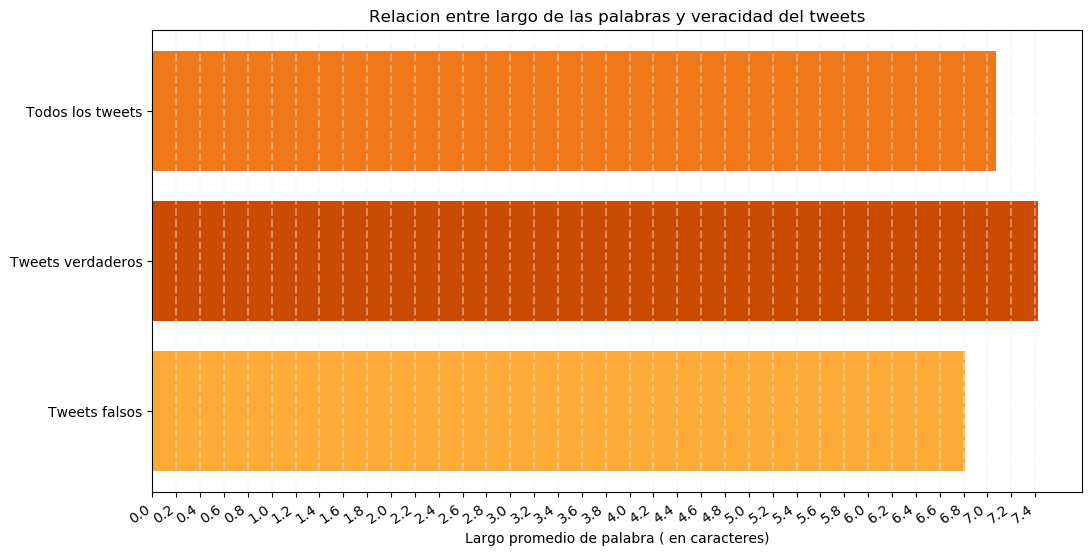

In [186]:
plt.figure(figsize= (12,6))

ax = plt.subplot()

# Example data
labels = ('Todos los tweets', 'Tweets verdaderos', 'Tweets falsos',)
y_pos = np.arange(len(labels))
promedio = [long_promedio, long_promedioV, long_promedioF]

ax.barh(y_pos, promedio, align='center', color = cmap([0.6,0.75,0.45]))
ax.set_yticks(y_pos)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)

plt.xticks(np.arange(0, 7.5, step=0.2), rotation=35,fontsize=10,ha='right')

lineas = ax.get_xticks()
for i in lineas:
      ax.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')

ax.invert_yaxis()  
ax.set_xlabel('Largo promedio de palabra ( en caracteres)')
ax.set_title('Relacion entre largo de las palabras y veracidad del tweets')


In [ ]:
plt.figure(figsize= (18,6))

fig, ax = plt.subplots()

# Example data
labels = ('tweets totales', 'tweets verdaderos', 'tweets falsos',)
y_pos = np.arange(len(labels))
promedio = [long_promedio, long_promedioV, long_promedioF]

ax.barh(y_pos, promedio, align='center', color = cmap([0.6,0.7,0.5]))
ax.set_yticks(y_pos)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
plt.xticks(np.arange(0, 7.5, step=0.2))

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Largo promedio de palabra ( en caracteres)')
ax.set_title('Hay relacion entre el largo de las palabras y la veracidad del tweet?')
